<a href="https://colab.research.google.com/github/PrathamKumar125/Basic-Machine-Learning/blob/master/Sequential_bleedDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# read csv file into a pandas dataframe
import numpy as np
import pandas as pd

train = pd.read_csv('AID362red_train.csv')
test = pd.read_csv('AID362red_test.csv')
test.head(5)

,NEG_01_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,NEG_06_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,3.8086,4.924,60.45,6,4,1,362.857,1,0,Active
1,0,0,0,0,0,0,0,0,0,0,...,3.9886,4.954,50.44,2,2,1,320.266,1,0,Active
2,0,0,0,0,0,0,0,0,0,0,...,3.6222,1.399,103.22,3,6,1,376.459,0,1,Active
3,0,0,0,0,0,0,0,0,0,0,...,3.7461,4.721,137.73,7,6,3,442.581,0,0,Active
4,0,0,0,0,0,0,0,0,0,0,...,3.7151,3.912,120.94,7,6,2,401.484,0,0,Active


In [ ]:
# Function for converting categorical label into a numerical one
def outcome_to_numeric(x):
    if x=='Inactive':
        return 0
    if x=='Active':
        return 1

In [ ]:
# Apply function to label column
train['label'] = train['Outcome'].apply(outcome_to_numeric)
test['label'] = test['Outcome'].apply(outcome_to_numeric)
test.head()

,NEG_01_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,NEG_06_POS,...,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome,label
0,0,0,0,0,0,0,0,0,0,0,...,4.924,60.45,6,4,1,362.857,1,0,Active,1
1,0,0,0,0,0,0,0,0,0,0,...,4.954,50.44,2,2,1,320.266,1,0,Active,1
2,0,0,0,0,0,0,0,0,0,0,...,1.399,103.22,3,6,1,376.459,0,1,Active,1
3,0,0,0,0,0,0,0,0,0,0,...,4.721,137.73,7,6,3,442.581,0,0,Active,1
4,0,0,0,0,0,0,0,0,0,0,...,3.912,120.94,7,6,2,401.484,0,0,Active,1


In [ ]:
# Drop categorical column
train=train.drop('Outcome', axis=1)
test=test.drop('Outcome', axis=1)

In [ ]:
# Split datasets into feature and label dataframes
x_train = train.drop('label', axis=1)
y_train = train['label']

x_test = test.drop('label', axis=1)
y_test = test['label']

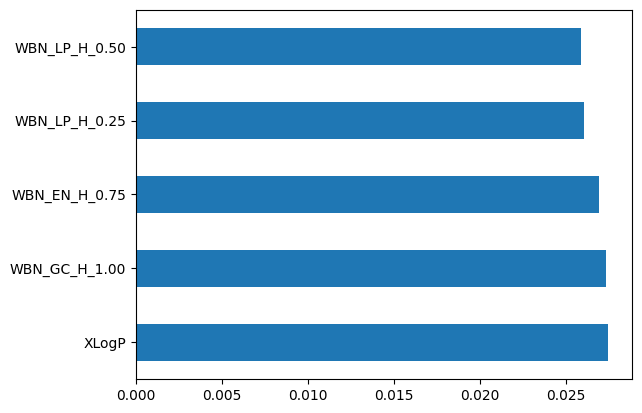

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(x_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
x_train = x_train[['WBN_GC_L_0.50', 'WBN_GC_H_1.00', 'MW', 'WBN_EN_H_0.50', 'WBN_EN_H_0.75']]

x_test = x_test[['WBN_GC_L_0.50', 'WBN_GC_H_1.00', 'MW', 'WBN_EN_H_0.50', 'WBN_EN_H_0.75']]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.noise import AlphaDropout
from keras import optimizers
from keras import layers


model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = optimizers.Adadelta(lr=.01)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adadelta.py:82: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.fit(x_train, y_train,
          epochs=30,
          batch_size=128)

Epoch 1/30
27/27 [==============================] - 1s 4ms/step - loss: 12.9785 - accuracy: 0.3836
Epoch 2/30
27/27 [==============================] - 0s 4ms/step - loss: 10.8986 - accuracy: 0.4443
Epoch 3/30
27/27 [==============================] - 0s 4ms/step - loss: 8.7579 - accuracy: 0.5212
Epoch 4/30
27/27 [==============================] - 0s 4ms/step - loss: 7.0275 - accuracy: 0.5892
Epoch 5/30
27/27 [==============================] - 0s 3ms/step - loss: 5.8057 - accuracy: 0.6380
Epoch 6/30
27/27 [==============================] - 0s 4ms/step - loss: 4.9600 - accuracy: 0.6763
Epoch 7/30
27/27 [==============================] - 0s 4ms/step - loss: 3.9669 - accuracy: 0.7274
Epoch 8/30
27/27 [==============================] - 0s 3ms/step - loss: 3.4829 - accuracy: 0.7578
Epoch 9/30
27/27 [==============================] - 0s 2ms/step - loss: 2.8849 - accuracy: 0.7867
Epoch 10/30
27/27 [==============================] - 0s 3ms/step - loss: 2.3859 - accuracy: 0.8212
Epoch 11/30
27/27

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=128)

7/7 [==============================] - 0s 3ms/step - loss: 0.7578 - accuracy: 0.9860


In [ ]:
score

[0.7578080892562866, 0.985981285572052]